# Visualizing PCA for better understanding

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {
"Maths":[95, 88, 92, 70, 68, 75, 45, 50, 40, 60],
"Science":[90, 85, 94, 72, 65, 78, 50, 55, 42, 58],
"English":[60, 65, 62, 80, 82, 75, 88, 84, 90, 70],
"Hindi": [58, 63, 60, 78, 85, 72, 90, 82, 88, 68]
}

Computer center - This is center of the two columns
E.g center of Maths-Science or Maths-English

In [15]:
def pca_2d_plot_raw(X, x_label, y_label, title):
    center = X.mean(axis=0)
    print(f"\nCenter of {x_label}-{y_label}: {center}\n")

    #center the data
    #subtract center from each data point
    X_centered = X - center
    
    #covarience matrix of the centered data
    cov_matrix = np.cov(X_centered.T)
    print("Covariance Matrix:\n", cov_matrix)

    #Eigenvalues and Eigenvectors
    #eig finds eigenvalues = amount of variance in each direction
    #(How strongly data stretches in that direction)
    #eigenvectors = directions themselves
    #For 2D data, we get 2 eigenvalues, called lambda1 and lambda2
    eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

    #which eigenvalue is higher? Shows maximum variance
    #Gives us PC1
    idx_max = np.argmax(eig_vals)

    #PC1 = Line where data shows maximum spread
    pc1 = eig_vecs[:,idx_max]

    #Actual amount of variance along PC1
    #High value: Data is stretched along the line, small = not much
    pc1_val = eig_vals[idx_max]
    print("PC1 direction vector:\n", pc1)
    print("PC1 eigenvalue (Variance along PC1):", pc1_val)

    #Project points onto PC1
    projections = X_centered.dot(pc1).reshape(-1,1)*pc1
    projected_points = center + projections

    # Plot
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], color='blue')
    plt.scatter(center[0], center[1], color='red', marker='x', s=100)
    plt.scatter(projected_points[:,0], projected_points[:,1], color='orange')

    line_length =30
    pc1_line =np.array([center - pc1*line_length, center + pc1*line_length])
    plt.plot(pc1_line[:,1],pc1_line[:, 1], color='green')

    for original, projected in zip(X, projected_points):
        plt.plot([original[0], projected[0]], [original[1], projected[1]], color='gray', linestyle='-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()
    return pc1_val


#### Maths vs Science (less spread)


Center of Maths-Science: [68.3 68.9]

Covariance Matrix:
 [[384.23333333 343.25555556]
 [343.25555556 314.98888889]]
PC1 direction vector:
 [0.74173954 0.67068805]
PC1 eigenvalue (Variance along PC1): 694.6083207974475


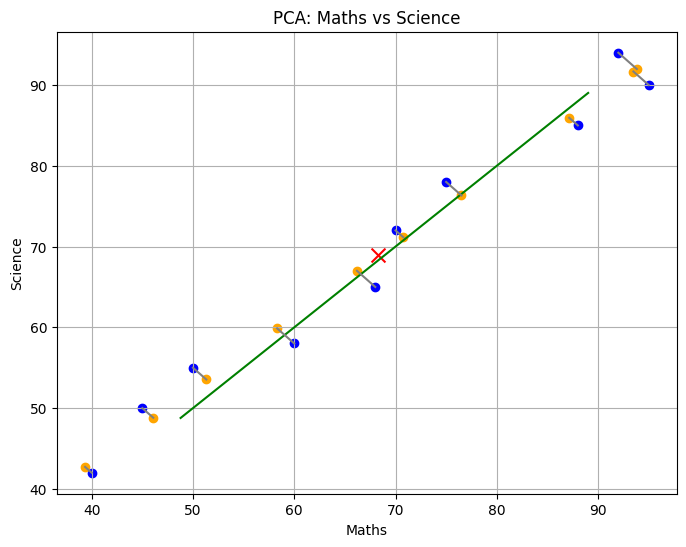

In [16]:
X1 = np.array([data["Maths"],data['Science']]).T
pc1_val1 = pca_2d_plot_raw(X1, 'Maths', 'Science', 'PCA: Maths vs Science')

#### Maths vs English (more spread)


Center of Maths-English: [68.3 75.6]

Covariance Matrix:
 [[ 384.23333333 -194.42222222]
 [-194.42222222  118.26666667]]
PC1 direction vector:
 [ 0.88446631 -0.46660406]
PC1 eigenvalue (Variance along PC1): 486.8016237224264


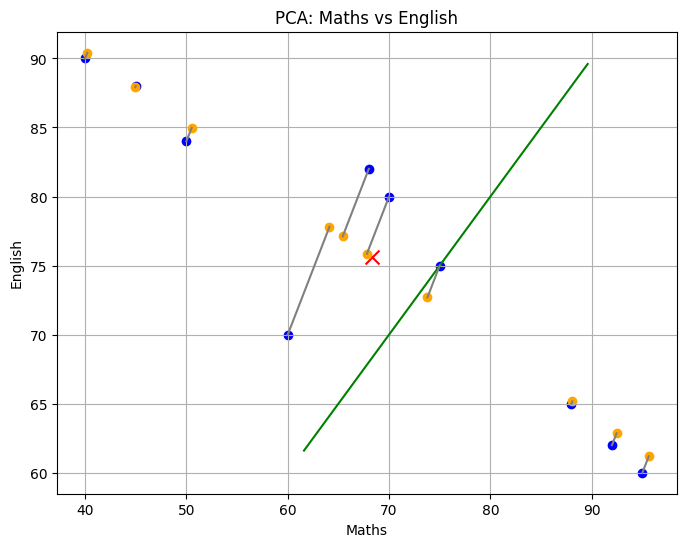

In [17]:
X2 = np.array([data["Maths"],data['English']]).T
pc1_val2 = pca_2d_plot_raw(X2, 'Maths', 'English', 'PCA: Maths vs English')

In [19]:
print("\nSummary of PC1 eigenvalues (vaiance along PC1):\n")
print(f"Maths vs Science PC1: {pc1_val1}\nMaths vs English PC2: {pc1_val2}")


Summary of PC1 eigenvalues (vaiance along PC1):

Maths vs Science PC1: 694.6083207974475
Maths vs English PC2: 486.8016237224264
